Importing modules

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
import librosa
import random
import IPython.display as ipd


In [3]:
pip  install pedalboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.6 MB/s eta 0:00:00


In [4]:
pip install midiutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54568 sha256=589e7ed2f3f4b3910514f20be8c5cb7dc31931d6c0b78805471f7cd4b0339eef
  Stored in directory: /root/.cache/pip/wheels/af/43/4a/00b5e4f2fe5e2cd6e92b461995a3a97a2cebb30ab5783501b0
Successfully built midiutil


In [5]:
from midiutil import MIDIFile
from pedalboard import Pedalboard, Chorus, Reverb
from pedalboard.io import AudioFile

loading the image

In [6]:
ori_img = cv2.imread('colors.jpg')
img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)

In [7]:
height, width, depth = img.shape
dpi=plt.rcParams['figure.dpi']
figsize = width / float(dpi), height / float(dpi)

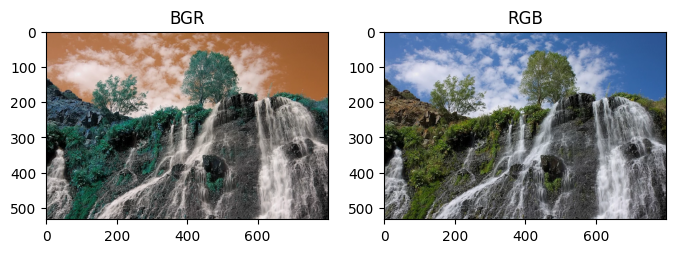

           Image Properties
Height =  533 Width =  800
Number of pixels in image =  426400


In [8]:
fig, axs = plt.subplots(1, 2, figsize = figsize)
axs[0].title.set_text('BGR')
axs[0].imshow(ori_img)
axs[1].title.set_text('RGB')
axs[1].imshow(img)
plt.show()
print('           Image Properties')
print('Height = ',height, 'Width = ', width)
print('Number of pixels in image = ', height * width)

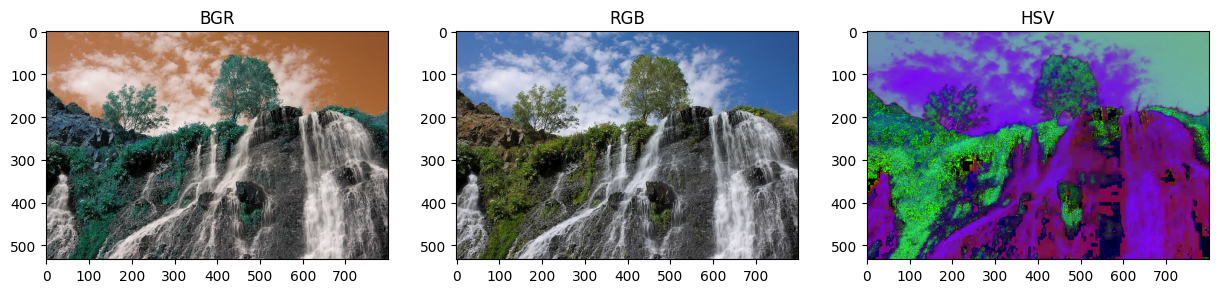

In [9]:
#Need function that reads pixel hue value
hsv = cv2.cvtColor(ori_img, cv2.COLOR_BGR2HSV)
#Plot the image
fig, axs = plt.subplots(1, 3, figsize = (15,15))
names = ['BGR','RGB','HSV']
imgs  = [ori_img, img, hsv]
i = 0
for elem in imgs:
    axs[i].title.set_text(names[i])
    axs[i].imshow(elem)
    axs[i].grid(False)
    i += 1
plt.show()


In [10]:
i=0 ; j=0
#Initialize array the will contain Hues for every pixel in image
hues = []
for i in range(height):
    for j in range(width):
        hue = hsv[i][j][0] #This is the hue value at pixel coordinate (i,j)
        hues.append(hue)

In [11]:
pixels_df = pd.DataFrame(hues, columns=['hues'])
pixels_df

,hues
0,109
1,109
2,109
3,109
4,109
...,...
426395,40
426396,40
426397,40
426398,30


***Converting hues to frequencies***


In [12]:
#Define frequencies that make up A-Harmonic Minor Scale
scale_freqs = [220.00, 246.94 ,261.63, 293.66, 329.63, 349.23, 415.30]
def hue2freq(h,scale_freqs):
    thresholds = [26 , 52 , 78 , 104,  128 , 154 , 180]
    note = scale_freqs[0]
    if (h <= thresholds[0]):
         note = scale_freqs[0]
    elif (h > thresholds[0]) & (h <= thresholds[1]):
        note = scale_freqs[1]
    elif (h > thresholds[1]) & (h <= thresholds[2]):
        note = scale_freqs[2]
    elif (h > thresholds[2]) & (h <= thresholds[3]):
        note = scale_freqs[3]
    elif (h > thresholds[3]) & (h <= thresholds[4]):
        note = scale_freqs[4]
    elif (h > thresholds[4]) & (h <= thresholds[5]):
        note = scale_freqs[5]
    elif (h > thresholds[5]) & (h <= thresholds[6]):
        note = scale_freqs[6]
    else:
        note = scale_freqs[0]

    return note

In [13]:
pixels_df['notes'] = pixels_df.apply(lambda row : hue2freq(row['hues'],scale_freqs), axis = 1)
pixels_df

,hues,notes
0,109,329.63
1,109,329.63
2,109,329.63
3,109,329.63
4,109,329.63
...,...,...
426395,40,246.94
426396,40,246.94
426397,40,246.94
426398,30,246.94


In [14]:
frequencies = pixels_df['notes'].to_numpy()

In [15]:
song = np.array([])
sr = 22050 # sample rate
T = 0.1    # 0.1 second duration
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
#Make a song with numpy array :]
#nPixels = int(len(frequencies))#All pixels in image
nPixels = 60
for i in range(nPixels):
    val = frequencies[i]
    note  = 0.5*np.sin(2*np.pi*val*t)
    song  = np.concatenate([song, note])
ipd.Audio(song, rate=sr) # load a NumPy array


In [16]:
from scipy.io import wavfile
wavfile.write('ini_song.wav'    , rate = 22050, data = song.astype(np.float32))

In [17]:
song = np.array([])
octaves = np.array([0.5,1,2])
sr = 22050 # sample rate
T = 0.1    # 0.1 second duration
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
#Make a song with numpy array :]
#nPixels = int(len(frequencies))#All pixels in image
nPixels = 60
for i in range(nPixels):
    octave = random.choice(octaves)
    val =  octave * frequencies[i]
    note  = 0.5*np.sin(2*np.pi*val*t)
    song  = np.concatenate([song, note])
ipd.Audio(song, rate=sr) # load a NumPy array

In [18]:
wavfile.write('octave_song.wav'    , rate = 22050, data = song.astype(np.float32))

In [19]:
def img2music(img, scale = [220.00, 246.94 ,261.63, 293.66, 329.63, 349.23, 415.30],
              sr = 22050, T = 0.1, nPixels = 60, useOctaves = True, randomPixels = False,
              harmonize = 'U0'):
    """
    Args:
        img    :     (array) image to process
        scale  :     (array) array containing frequencies to map H values to
        sr     :     (int) sample rate to use for resulting song
        T      :     (int) time in seconds for dutation of each note in song
        nPixels:     (int) how many pixels to use to make song
    Returns:
        song   :     (array) Numpy array of frequencies. Can be played by ipd.Audio(song, rate = sr)
    """
    #Convert image to HSV
    hsv = cv2.cvtColor(ori_img, cv2.COLOR_BGR2HSV)

    #Get shape of image
    height, width, depth = ori_img.shape

    i=0 ; j=0 ; k=0
    #Initialize array the will contain Hues for every pixel in image
    hues = []
    for i in range(height):
        for j in range(width):
            hue = hsv[i][j][0] #This is the hue value at pixel coordinate (i,j)
            hues.append(hue)

    #Make dataframe containing hues and frequencies
    pixels_df = pd.DataFrame(hues, columns=['hues'])
    pixels_df['frequencies'] = pixels_df.apply(lambda row : hue2freq(row['hues'],scale), axis = 1)
    frequencies = pixels_df['frequencies'].to_numpy()
    harmony_select = {'U0' : 1,
                      'ST' : 16/15,
                      'M2' : 9/8,
                      'm3' : 6/5,
                      'M3' : 5/4,
                      'P4' : 4/3,
                      'DT' : 45/32,
                      'P5' : 3/2,
                      'm6': 8/5,
                      'M6': 5/3,
                      'm7': 9/5,
                      'M7': 15/8,
                      'O8': 2
                     }
    harmony = np.array([]) #This array will contain the song harmony
    harmony_val = harmony_select[harmonize] #This will select the ratio for the desired harmony

    song_freqs = np.array([]) #This array will contain the chosen frequencies used in our song :]
    song = np.array([])       #This array will contain the song signal
    octaves = np.array([0.5,1,2])#Go an octave below, same note, or go an octave above
    t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
    #Make a song with numpy array :]
    #nPixels = int(len(frequencies))#All pixels in image
    for k in range(nPixels):
        if useOctaves:
            octave = random.choice(octaves)
        else:
            octave = 1

        if randomPixels == False:
            val =  octave * frequencies[k]
        else:
            val = octave * random.choice(frequencies)
          #Make note and harmony note
        note   = 0.5*np.sin(2*np.pi*val*t)
        h_note = 0.5*np.sin(2*np.pi*harmony_val*val*t)

        #Place notes into corresponfing arrays
        song       = np.concatenate([song, note])
        harmony    = np.concatenate([harmony, h_note])
        #song_freqs = np.concatenate([song_freqs, val])

    return song, pixels_df, harmony

In [20]:
def get_piano_notes():
    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B']
    base_freq = 440 #Frequency of Note A4
    keys = np.array([x+str(y) for y in range(0,9) for x in octave])
    # Trim to standard 88 keys
    start = np.where(keys == 'A0')[0][0]
    end = np.where(keys == 'C8')[0][0]
    keys = keys[start:end+1]

    note_freqs = dict(zip(keys, [2**((n+1-49)/12)*base_freq for n in range(len(keys))]))
    note_freqs[''] = 0.0 # stop
    return note_freqs

def get_sine_wave(frequency, duration, sample_rate=44100, amplitude=4096):
    t = np.linspace(0, duration, int(sample_rate*duration)) # Time axis
    wave = amplitude*np.sin(2*np.pi*frequency*t)
    return wave

In [21]:
def makeScale(whichOctave, whichKey, whichScale, makeHarmony = 'U0'):

    #Load note dictionary
    note_freqs = get_piano_notes()

    #Define tones. Upper case are white keys in piano. Lower case are black keys
    scale_intervals = ['A','a','B','C','c','D','d','E','F','f','G','g']

    #Find index of desired key
    index = scale_intervals.index(whichKey)

    #Redefine scale interval so that scale intervals begins with whichKey
    new_scale = scale_intervals[index:12] + scale_intervals[:index]

    #Choose scale
    if whichScale == 'AEOLIAN':
        scale = [0, 2, 3, 5, 7, 8, 10]
    elif whichScale == 'BLUES':
        scale = [0, 2, 3, 4, 5, 7, 9, 10, 11]
    elif whichScale == 'PHYRIGIAN':
        scale = [0, 1, 3, 5, 7, 8, 10]
    elif whichScale == 'CHROMATIC':
        scale = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    elif whichScale == 'DIATONIC_MINOR':
        scale = [0, 2, 3, 5, 7, 8, 10]
    elif whichScale == 'DORIAN':
        scale = [0, 2, 3, 5, 7, 9, 10]
    elif whichScale == 'HARMONIC_MINOR':
        scale = [0, 2, 3, 5, 7, 8, 11]
    elif whichScale == 'LYDIAN':
        scale = [0, 2, 4, 6, 7, 9, 11]
    elif whichScale == 'MAJOR':
        scale = [0, 2, 4, 5, 7, 9, 11]
    elif whichScale == 'MELODIC_MINOR':
        scale = [0, 2, 3, 5, 7, 8, 9, 10, 11]
    elif whichScale == 'MINOR':
        scale = [0, 2, 3, 5, 7, 8, 10]
    elif whichScale == 'MIXOLYDIAN':
        scale = [0, 2, 4, 5, 7, 9, 10]
    elif whichScale == 'NATURAL_MINOR':
        scale = [0, 2, 3, 5, 7, 8, 10]
    elif whichScale == 'PENTATONIC':
        scale = [0, 2, 4, 7, 9]
    else:
        print('Invalid scale name')

    #Make harmony dictionary (i.e. fundamental, perfect fifth, major third, octave)
    #unison           = U0
    #semitone         = ST
    #major second     = M2
    #minor third      = m3
    #major third      = M3
    #perfect fourth   = P4
    #diatonic tritone = DT
    #perfect fifth    = P5
    #minor sixth      = m6
    #major sixth      = M6
    #minor seventh    = m7
    #major seventh    = M7
    #octave           = O8
    harmony_select = {'U0' : 1,
                      'ST' : 16/15,
                      'M2' : 9/8,
                      'm3' : 6/5,
                      'M3' : 5/4,
                      'P4' : 4/3,
                      'DT' : 45/32,
                      'P5' : 3/2,
                      'm6': 8/5,
                      'M6': 5/3,
                      'm7': 9/5,
                      'M7': 15/8,
                      'O8': 2
                      }

    #Get length of scale (i.e., how many notes in scale)
    nNotes = len(scale)

    #Initialize arrays
    freqs = []
    #harmony = []
    #harmony_val = harmony_select[makeHarmony]
    for i in range(nNotes):
        note = new_scale[scale[i]] + str(whichOctave)
        freqToAdd = note_freqs[note]
        freqs.append(freqToAdd)
        #harmony.append(harmony_val*freqToAdd)
    return freqs#,harmony

In [22]:
test_scale,test_harmony = makeScale(3, 'a', 'HARMONIC_MINOR',makeHarmony = 'm6')
print(test_scale)
print(test_harmony)

ValueError: ignored

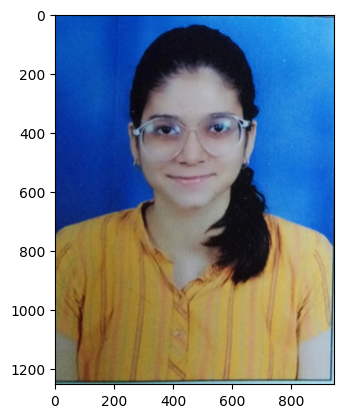

In [24]:
me = cv2.imread('me.jpg')
me1 = cv2.cvtColor(me, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(me1)
plt.grid(False)
plt.show()

In [25]:
me_scale = makeScale(1, 'd', 'MAJOR')
me_song, me_df,me_song_harmony  = img2music(me,
                                                                me_scale,
                                                                T = 0.3,
                                                                randomPixels = True,
                                                                useOctaves = True)

wavfile.write('me_song2.wav'    , rate = 22050, data = me_song.astype(np.float32))
ipd.Audio(me_song, rate = sr)

In [26]:
me_df

,hues,frequencies
0,109,58.270470
1,109,58.270470
2,109,58.270470
3,109,58.270470
4,109,58.270470
...,...,...
426395,40,43.653529
426396,40,43.653529
426397,40,43.653529
426398,30,43.653529
